## Análisis de los datos inciales

In [19]:
# Librerias necesarias 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import joblib
from plotly.subplots import make_subplots

In [2]:
# Se cargan los datos preprocesados 
df = joblib.load('Data_final\\df.pkl')

### Analisis univariado 

In [3]:
df.head(3)

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico,Numero_Comorbilidades
0,18686469,1,Bogota,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,3,1.579219e+06,40,61,Diagnostico Pendiente,0.0
1,18686469,1,Bogota,0,0,0,0,0.0,CONSULTA EXTERNA,1,4.428056e+05,40,61,Diagnostico Pendiente,0.0
2,16087775,0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,4.616260e+05,40,729,Diagnostico Pendiente,0.0


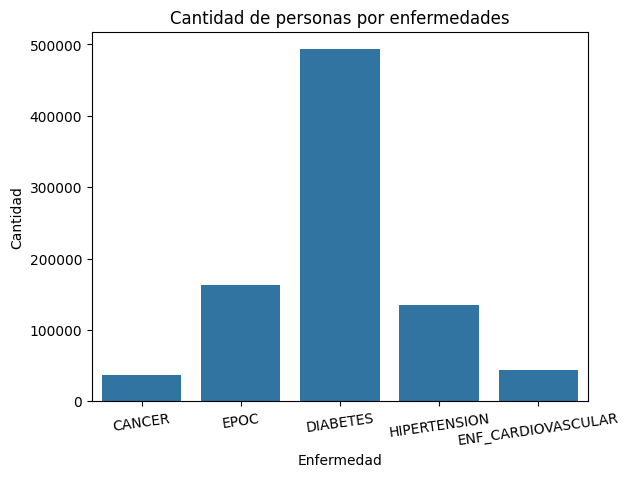

In [5]:
c1 = pd.DataFrame(df[['CANCER','EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR']].sum(), columns = ['Número de pacientes'])
c1 = c1.reset_index()
c1 = c1.rename(columns = {'index':'Enfermedad'})

sns.barplot(c1, x ='Enfermedad', y = 'Número de pacientes')
plt.title('Cantidad de personas por enfermedades')
plt.ylabel('Cantidad')
plt.xticks(rotation = 8)
plt.show();

**Reclamaciones**

C:\Users\jorge\AppData\Local\Temp\ipykernel_21352\3491895564.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Cantidad', y = 'Reclamacion', data = conteo_reclamaciones, palette = 'viridis')
C:\Users\jorge\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


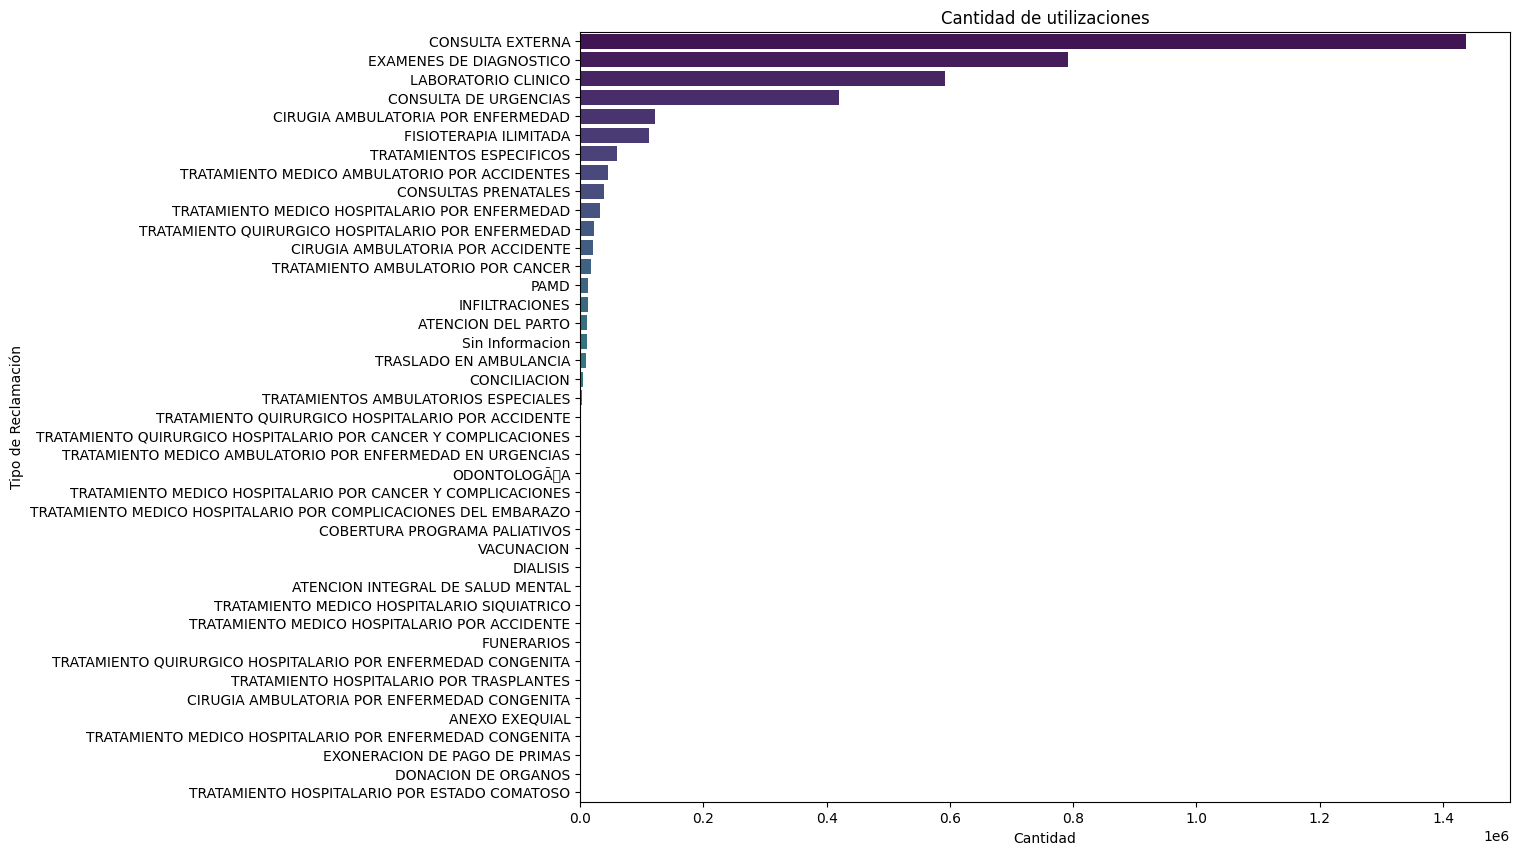

In [7]:
conteo_reclamaciones = df.groupby('Reclamacion').size().reset_index(name = 'Cantidad')
conteo_reclamaciones = conteo_reclamaciones.sort_values(by = 'Cantidad', ascending = False)

plt.figure(figsize = (12, 10))
sns.barplot(x = 'Cantidad', y = 'Reclamacion', data = conteo_reclamaciones, palette = 'viridis')
plt.title('Cantidad de utilizaciones')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Reclamación')
plt.show();

**Eventos por cada reclamación**

C:\Users\jorge\AppData\Local\Temp\ipykernel_21352\1903827591.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Eventos'], shade=True, color='skyblue')


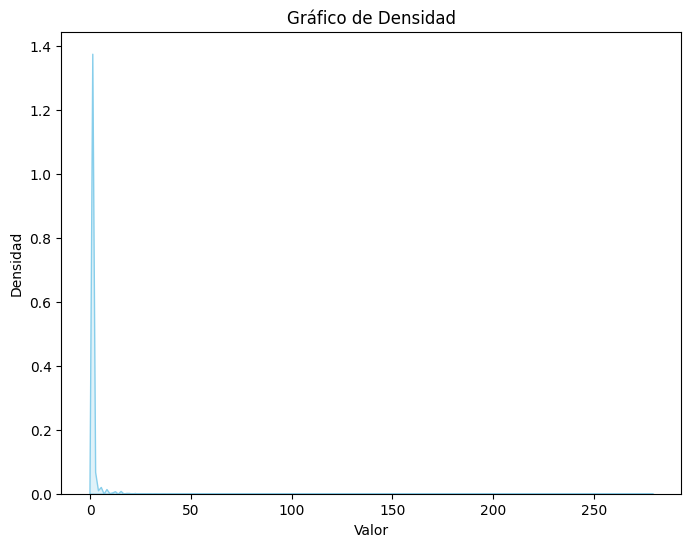

In [9]:
plt.figure(figsize=(8, 6))

# Crear gráfico de densidad usando seaborn
sns.kdeplot(df['Eventos'], shade=True, color='skyblue')

# Añadir título y etiquetas
plt.title('Gráfico de Densidad')
plt.xlabel('Valor')
plt.ylabel('Densidad')

# Mostrar el gráfico de densidad
plt.show();

**Distribución de Valor Pagado**

C:\Users\jorge\AppData\Local\Temp\ipykernel_21352\2295265059.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Valor_Pagado'], shade=True, color='skyblue')


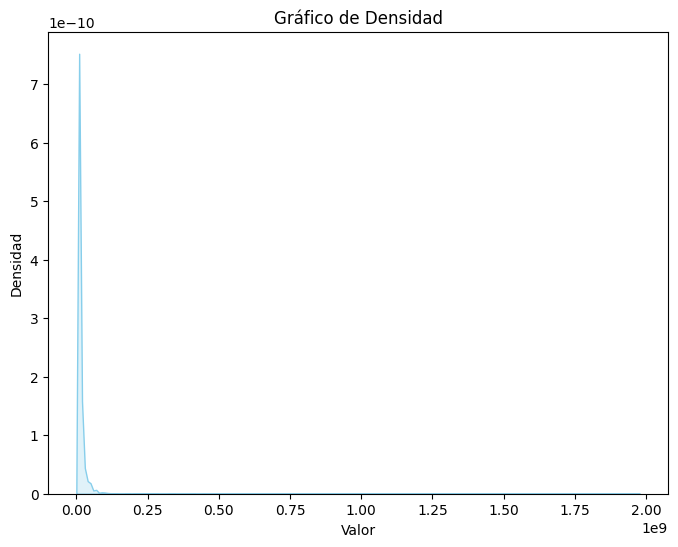

In [10]:
plt.figure(figsize=(8, 6))

# Crear gráfico de densidad usando seaborn
sns.kdeplot(df['Valor_Pagado'], shade=True, color='skyblue')

# Añadir título y etiquetas
plt.title('Gráfico de Densidad')
plt.xlabel('Valor')
plt.ylabel('Densidad')

# Mostrar el gráfico de densidad
plt.show();

**Distribución de la edad de los asegurados**

C:\Users\jorge\AppData\Local\Temp\ipykernel_22064\1488609397.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Edad'], shade=True, color='skyblue', ax=axs[1])


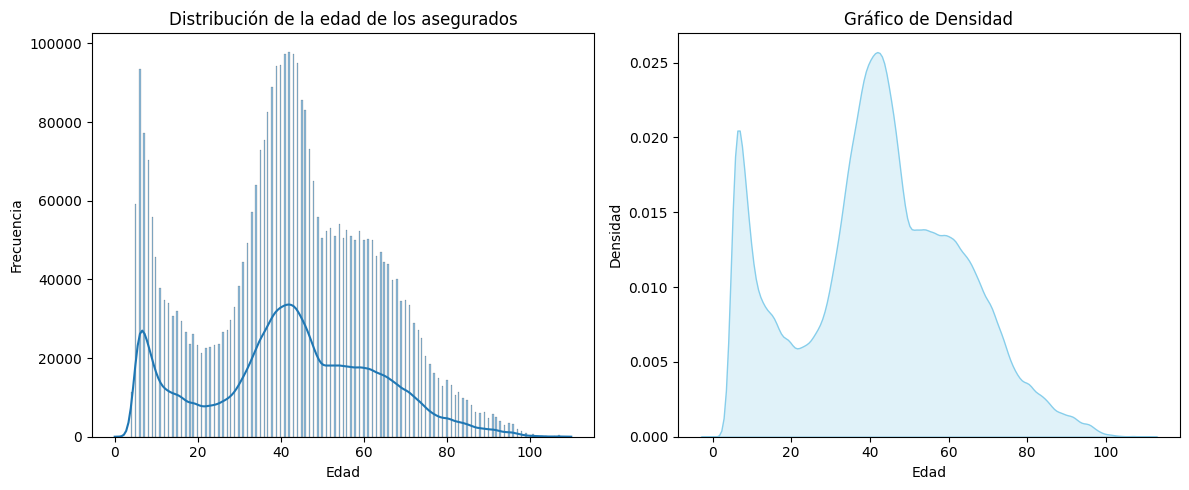

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graficar el histograma 
sns.histplot(df['Edad'], kde=True, ax=axs[0])  
axs[0].set_title('Distribución de la edad de los asegurados')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Frecuencia')

# Graficar el gráfico de densidad 
sns.kdeplot(df['Edad'], shade=True, color='skyblue', ax=axs[1])
axs[1].set_title('Gráfico de Densidad')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Densidad')

# Ajustar automáticamente los espacios entre los subgráficos para que no haya superposiciones
plt.tight_layout()

# Mostrar la figura con ambos gráficos
plt.show()

**Distribución de la duración de la póliza**

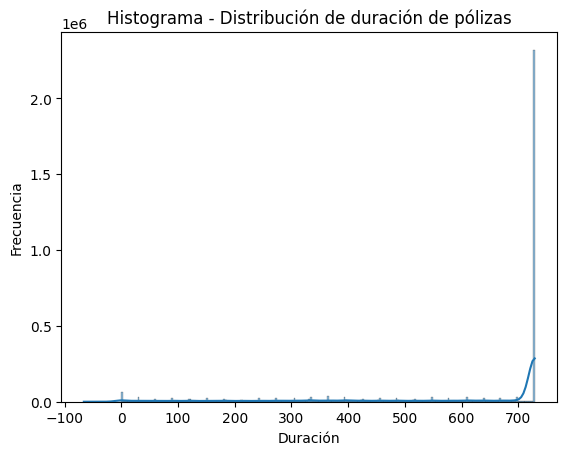

In [12]:
# Graficar el histograma 
sns.histplot(df['Duracion_Poliza_Dias'], kde=True)  
plt.title('Histograma - Distribución de duración de pólizas')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')

# Mostrar el gráfico de densidad
plt.show()

Observamos que hay algunas duraciones de pólizas menores a 0 días. Esto indica que en la columna FECHA_CANCELACION hay una fecha anterior a FECHA_INICIO. Esto claramente es un error en la digitación de los datos por lo cual debemos tomar una decisión con respecto a qué hacer con estos registros. 

In [13]:
df.loc[df['Duracion_Poliza_Dias']<0].head()

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico,Numero_Comorbilidades
304886,55027756,0,Cartagena,0,0,0,0,0.0,CONSULTA EXTERNA,1,403623.960642,11,-19,Diagnostico Pendiente,0.0
304889,55027756,0,Cartagena,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,1,415363.784642,11,-19,Diagnostico Pendiente,0.0
304892,55027756,0,Cartagena,0,0,0,0,0.0,CONSULTA EXTERNA,2,455572.681842,11,-19,Diagnostico Pendiente,0.0
304895,55027756,0,Cartagena,0,0,0,0,0.0,CONSULTA EXTERNA,1,435174.737642,11,-19,Diagnostico Pendiente,0.0
304898,55027756,0,Cartagena,0,0,0,0,0.0,CONSULTA EXTERNA,1,435174.737642,11,-19,Diagnostico Pendiente,0.0


**Diagnósticos**

C:\Users\jorge\AppData\Local\Temp\ipykernel_21352\3787916212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad', y='Clasificacion_Diagnostico', data=conteo_diagnosticos, palette='viridis')


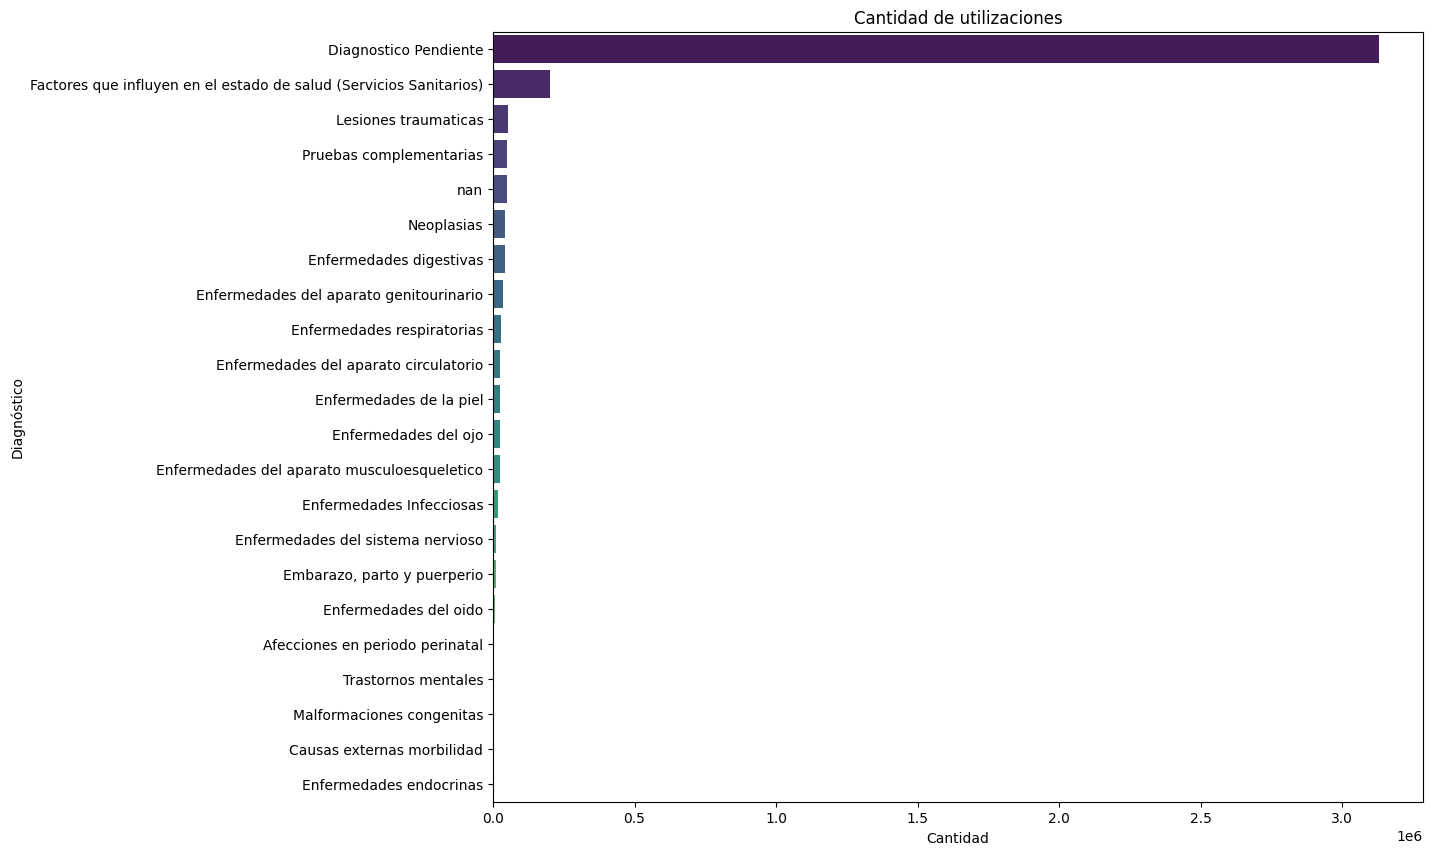

In [11]:
conteo_diagnosticos = df.groupby('Clasificacion_Diagnostico').size().reset_index(name='Cantidad')
conteo_diagnosticos = conteo_diagnosticos.sort_values(by='Cantidad', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Cantidad', y='Clasificacion_Diagnostico', data=conteo_diagnosticos, palette='viridis')
plt.title('Cantidad de utilizaciones')
plt.xlabel('Cantidad')
plt.ylabel('Diagnóstico')
plt.show()

**Número de comorbilidades**

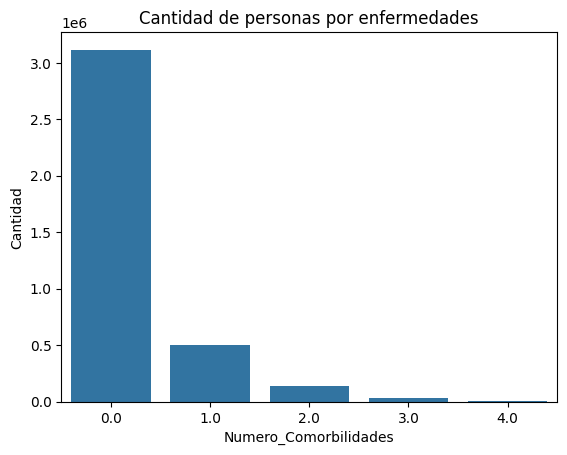

In [12]:
conteo_morbilidades= df.groupby('Numero_Comorbilidades').size().reset_index(name='Cantidad')
conteo_morbilidades = conteo_morbilidades.sort_values(by='Cantidad', ascending=False)

sns.barplot(conteo_morbilidades, x='Numero_Comorbilidades', y ='Cantidad')
plt.title('Cantidad de personas por enfermedades')
plt.ylabel('Cantidad')
plt.show()

In [16]:
# Lista de variables binarias
variables = ['CANCER', 'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR', 'Sexo', 'Ciudad']

# Crear un gráfico de torta para cada variable
for variable in variables:
    # Contar el número de ocurrencias de cada categoría en la variable
    attrition_counts = df[variable].value_counts()
    
    # Crear el gráfico de torta con la paleta de colores personalizada
    fig = px.pie(values=attrition_counts, 
                 names=attrition_counts.index, 
                 title=f'Distribución de {variable}')
    fig.show()

## Análisis bivariado ##

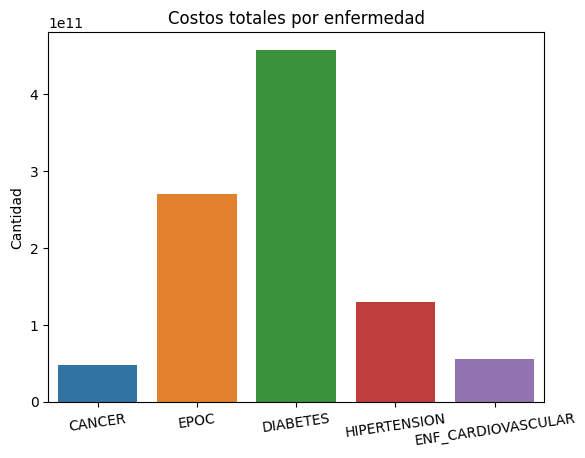

In [13]:
costos_cancer = df.loc[df['CANCER'] == 1]
costos_cancer = costos_cancer[['CANCER','Valor_Pagado']]

costos_epoc = df.loc[df['EPOC'] == 1]
costos_epoc = costos_epoc[['EPOC','Valor_Pagado']]

costos_diabetes = df.loc[df['DIABETES'] == 1]
costos_diabetes = costos_diabetes[['DIABETES','Valor_Pagado']]

costos_hipertension = df.loc[df['HIPERTENSION'] == 1]
costos_hipertension = costos_hipertension[['HIPERTENSION','Valor_Pagado']]

costos_cardiovascular = df.loc[df['ENF_CARDIOVASCULAR'] == 1]
costos_cardiovascular = costos_cardiovascular[['ENF_CARDIOVASCULAR','Valor_Pagado']]

costos_totales = {'CANCER':costos_cancer['Valor_Pagado'].sum(),
                 'EPOC': costos_epoc['Valor_Pagado'].sum(), 
                 'DIABETES': costos_diabetes['Valor_Pagado'].sum(), 
                 'HIPERTENSION': costos_hipertension['Valor_Pagado'].sum(), 
                 'ENF_CARDIOVASCULAR': costos_cardiovascular['Valor_Pagado'].sum()}

df_costos = pd.DataFrame(costos_totales, index=['Costos totales'])

sns.barplot(df_costos)
plt.title('Costos totales por enfermedad')
plt.ylabel('Cantidad')
plt.xticks(rotation = 8)
plt.show()


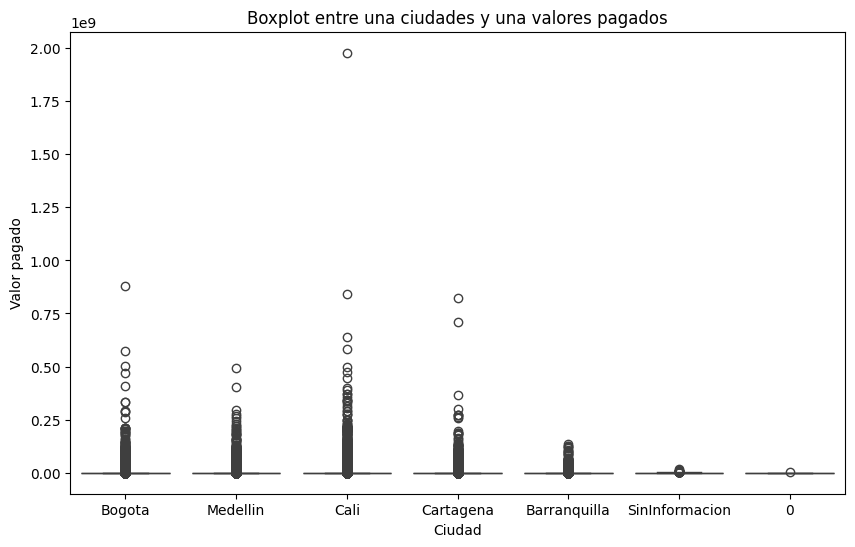

In [14]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Ciudad', y='Valor_Pagado', data=df)
plt.title('Boxplot entre una ciudades y una valores pagados')
plt.xlabel('Ciudad')
plt.ylabel('Valor pagado')

plt.show();

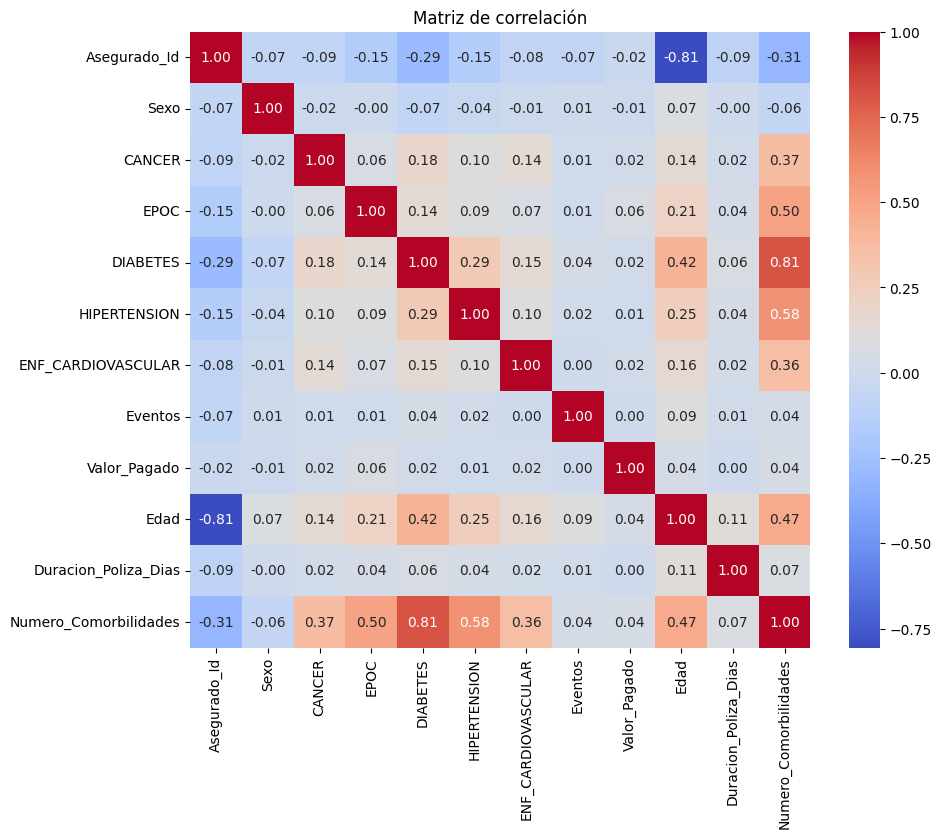

In [16]:
df_numeric = df.select_dtypes(include='number')

correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')

plt.show();

**Costos asociados al número de comorbilidades**

In [18]:
# Número de comorbilidades presente en los usuarios
conteo_morbilidades = df.groupby('Numero_Comorbilidades').size().reset_index(name = 'Cantidad')

# Costos asociados al número de comorbilidades
df["Valor_Pagado"] = df["Valor_Pagado"].astype(int)
costos_comorbilidad = df.groupby('Numero_Comorbilidades')['Valor_Pagado'].sum().reset_index(name = 'Costos')

In [23]:
# Tabla comparación entre la cantidad de usuarios con comorbilidades vs los costos asociados al número de comorbilidades
conteo_morbilidades['Costos'] = costos_comorbilidad['Costos']
conteo_morbilidades

,Numero_Comorbilidades,Cantidad,Costos
0,0.0,3115912,2324481297546
1,1.0,497631,507357010427
2,2.0,134285,152473757961
3,3.0,28352,38046452201
4,4.0,5151,8744600974


In [26]:
# Diseñode de los diagramas
fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(
    go.Bar(x = conteo_morbilidades['Numero_Comorbilidades'], y = conteo_morbilidades['Cantidad'], name = 'Número de comorbilidades por usuarios', marker_color = 'cadetblue'),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = costos_comorbilidad['Numero_Comorbilidades'], y = costos_comorbilidad['Costos'], name = 'Costos por número de comorbilidad', marker_color = 'firebrick'),
    row = 1, col = 2
)

fig.update_layout(
    title_text = 'Cantidad de comorbilidades en los usuarios y sus costos asociados',
    template = 'simple_white')

fig.show();